In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read data from CSV file
data_df = pd.read_csv("Most_Popular_Baby_Names_in_NYC.csv")
data_df.shape

(13962, 6)

In [3]:
# Columns of dataset
data_df.columns

Index(['brth_yr', 'gndr', 'ethcty', 'nm', 'cnt', 'rnk'], dtype='object')

In [4]:
# First five records of dataset
data_df.head()

,brth_yr,gndr,ethcty,nm,cnt,rnk
0,2011,FEMALE,HISPANIC,GERALDINE,13,75
1,2011,FEMALE,HISPANIC,GIA,21,67
2,2011,FEMALE,HISPANIC,GIANNA,49,42
3,2011,FEMALE,HISPANIC,GISELLE,38,51
4,2011,FEMALE,HISPANIC,GRACE,36,53


In [5]:
# Number of unique values for each column of dataset
columns = list(data_df.columns)
for column in columns:
    print(f"len(unique({column})) = {len(pd.unique(data_df[column]))}")

len(unique(brth_yr)) = 4
len(unique(gndr)) = 2
len(unique(ethcty)) = 7
len(unique(nm)) = 2811
len(unique(cnt)) = 258
len(unique(rnk)) = 102


In [6]:
# Unique values for columns whose number of unique values is less than or equal to 10
columns = list(data_df.columns)
for column in columns:
    unique_values = pd.unique(data_df[column])
    if(len(unique_values) <= 10):
        print(f"unique({column}) = {unique_values}")

unique(brth_yr) = [2011 2012 2013 2014]
unique(gndr) = ['FEMALE' 'MALE']
unique(ethcty) = ['HISPANIC' 'WHITE NON HISPANIC' 'ASIAN AND PACIFIC ISLANDER'
 'BLACK NON HISPANIC' 'ASIAN AND PACI' 'BLACK NON HISP' 'WHITE NON HISP']


In [7]:
# Encoding the gndr column into two separate columns
data_df["fml"] = np.select([data_df["gndr"] == "FEMALE"], [1], default=0)
data_df["ml"] = np.select([data_df["gndr"] == "MALE"], [1], default=0)

# drop the gndr column as it's no longer needed
del data_df["gndr"]
data_df.head()

,brth_yr,ethcty,nm,cnt,rnk,fml,ml
0,2011,HISPANIC,GERALDINE,13,75,1,0
1,2011,HISPANIC,GIA,21,67,1,0
2,2011,HISPANIC,GIANNA,49,42,1,0
3,2011,HISPANIC,GISELLE,38,51,1,0
4,2011,HISPANIC,GRACE,36,53,1,0


In [8]:
# Encode the ethcty column into separate columns
data_df["hispanic"] = np.select(
    [data_df["ethcty"] == "HISPANIC"],
    [1],
    default=0
)

data_df["white"] = np.select(
    [(data_df["ethcty"] == "WHITE NON HISPANIC") | (data_df["ethcty"] == "WHITE NON HISP")],
    [1],
    default=0
)

data_df["asian_and_pacific_islander"] = np.select(
    [(data_df["ethcty"] == "ASIAN AND PACIFIC ISLANDER") | (data_df["ethcty"] == "ASIAN AND PACI")],
    [1], 
    default=0
)

data_df["black"] = np.select(
    [(data_df["ethcty"] == "BLACK NON HISPANIC") | (data_df["ethcty"] == "BLACK NON HISP")],
    [1],
    default=0
)

# Drop the ethcy column as it's no longer needed
del data_df["ethcty"]
data_df.head()

,brth_yr,nm,cnt,rnk,fml,ml,hispanic,white,asian_and_pacific_islander,black
0,2011,GERALDINE,13,75,1,0,1,0,0,0
1,2011,GIA,21,67,1,0,1,0,0,0
2,2011,GIANNA,49,42,1,0,1,0,0,0
3,2011,GISELLE,38,51,1,0,1,0,0,0
4,2011,GRACE,36,53,1,0,1,0,0,0


In [9]:
# Drop the name column
del data_df["nm"]
data_df.head()

,brth_yr,cnt,rnk,fml,ml,hispanic,white,asian_and_pacific_islander,black
0,2011,13,75,1,0,1,0,0,0
1,2011,21,67,1,0,1,0,0,0
2,2011,49,42,1,0,1,0,0,0
3,2011,38,51,1,0,1,0,0,0
4,2011,36,53,1,0,1,0,0,0


In [10]:
# Rename columns
data_df = data_df.rename(columns={"brth_yr": "birth_year", "cnt": "count", "rnk": "rank", "fml": "female", "ml": "male"})
data_df.head()

,birth_year,count,rank,female,male,hispanic,white,asian_and_pacific_islander,black
0,2011,13,75,1,0,1,0,0,0
1,2011,21,67,1,0,1,0,0,0
2,2011,49,42,1,0,1,0,0,0
3,2011,38,51,1,0,1,0,0,0
4,2011,36,53,1,0,1,0,0,0


In [11]:
# Standardize the data
features = list(data_df.columns)
x = data_df.loc[:, features].values
X = StandardScaler().fit_transform(x)

In [12]:
# Principal Component Analysis
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
principal_dataframe = pd.DataFrame(data=principal_components, columns=["principal component 1", "principal component 2"])

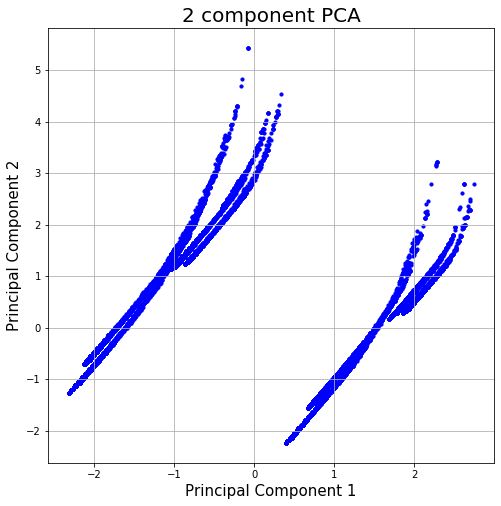

In [13]:
# Visualize 2D projection
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel("Principal Component 1", fontsize=15)
ax.set_ylabel("Principal Component 2", fontsize=15)
ax.set_title("2 component PCA", fontsize=20)

ax.scatter(principal_dataframe["principal component 1"], principal_dataframe["principal component 2"], c='b', s=10)
ax.grid()

In [14]:
# Elbow method to find out optimal number of clusters for K-Means
# Build the clustering model and calculate the values of the Distortion and Inertia
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}

k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k).fit(X)
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]) 
    inertias.append(kmeans.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0] 
    mapping2[k] = kmeans.inertia_ 

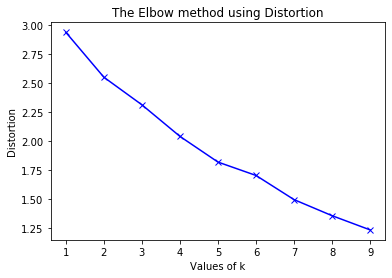

In [15]:
# The Elbow method using Distortion
plt.plot(k_range, distortions, "bx-")
plt.xlabel("Values of k")
plt.ylabel("Distortion")
plt.title("The Elbow method using Distortion")
plt.show()

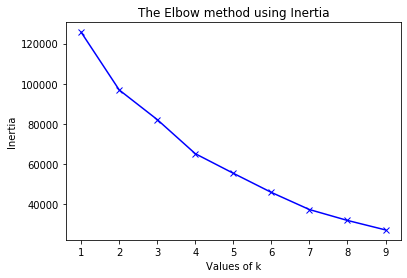

In [16]:
# The Elbow method using Inertia
plt.plot(k_range, inertias, "bx-")
plt.xlabel("Values of k")
plt.ylabel("Inertia")
plt.title("The Elbow method using Inertia")
plt.show()

In [20]:
# Observing the Elbow method above, we can conclude that the optimal number of clusters is between 2 and 6
# We can use Silhouette to determine which number is best.

k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For {k} clusters, the average silhouette score is: {silhouette_avg}.")

For 2 clusters, the average silhouette score is: 0.25268609380118817.
For 3 clusters, the average silhouette score is: 0.30855545407764534.
For 4 clusters, the average silhouette score is: 0.38760702150400855.
For 5 clusters, the average silhouette score is: 0.3862799705168312.
For 6 clusters, the average silhouette score is: 0.40678127372397394.
For 7 clusters, the average silhouette score is: 0.47302096631831547.
For 8 clusters, the average silhouette score is: 0.5044630650218294.
For 9 clusters, the average silhouette score is: 0.53010217001532.


In [34]:
# Apply the K-Means algorithm to the dataset
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

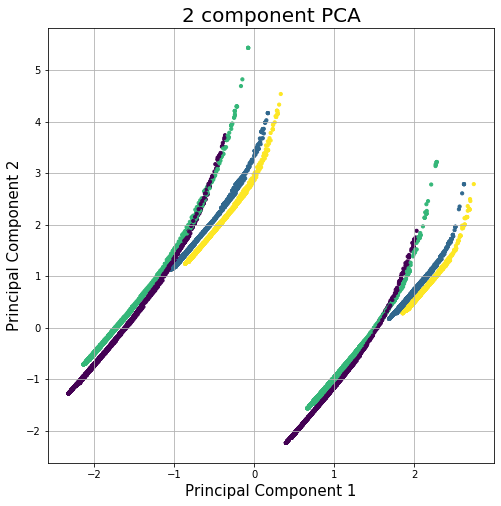

In [35]:
# Visualize 
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel("Principal Component 1", fontsize=15)
ax.set_ylabel("Principal Component 2", fontsize=15)
ax.set_title("2 component PCA", fontsize=20)

ax.scatter(principal_dataframe["principal component 1"], principal_dataframe["principal component 2"], c=y_kmeans, s=10)
ax.grid()